In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import re
import spacy
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import wordnet
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving CW_DataSet.csv to CW_DataSet.csv


In [ ]:

# Assuming the file uploaded is 'example.csv'
filename = 'CW_DataSet.csv'

# Read the CSV file
data = pd.read_csv(filename)

# Display the first few rows of the DataFrame
data.head()

,article_id,text
0,1,'Abhorrent' bottle attack on young Rangers fan...
1,2,'Afghan Girl' in iconic National Geographic ph...
2,3,'My whole family has been wiped out': Victims ...
3,4,'RHONY' STAR JULES WAINSTEIN Estranged Husband...
4,5,'Swam for their life': More survivors of Levia...


In [ ]:
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    tokens = [nlp(word)[0].lemma_ for word in tokens]

    return ' '.join(tokens)


data['processed_text'] = data['text'].apply(preprocess_text)
print(data.head())

   article_id                                               text  \
0           1  'Abhorrent' bottle attack on young Rangers fan...   
1           2  'Afghan Girl' in iconic National Geographic ph...   
2           3  'My whole family has been wiped out': Victims ...   
3           4  'RHONY' STAR JULES WAINSTEIN Estranged Husband...   
4           5  'Swam for their life': More survivors of Levia...   

                                      processed_text  
0  abhorrent bottle attack young ranger fan celti...  
1  afghan girl iconic national geographic photo a...  
2  whole family wipe victim dreamworld tragedy re...  
3  rhony star jule wainstein estrange husband sue...  
4  swam life survivor leviathan ii tragedy sue to...  


In [ ]:
pip install tensorflow

In [ ]:
data.drop('text', axis=1, inplace=True)
print(data.head())

   article_id                                     processed_text
0           1  abhorrent bottle attack young ranger fan celti...
1           2  afghan girl iconic national geographic photo a...
2           3  whole family wipe victim dreamworld tragedy re...
3           4  rhony star jule wainstein estrange husband sue...
4           5  swam life survivor leviathan ii tragedy sue to...


In [ ]:
def label_emotion(text):
    text_lower = text.lower()


    if any(keyword in text_lower for keyword in ['angry', 'attack', 'assault']):
        return 'angry'
    elif any(keyword in text_lower for keyword in ['happy', 'celebrate', 'joy']):
        return 'happy'
    elif any(keyword in text_lower for keyword in ['sad', 'tragedy', 'grief']):
        return 'sad'
    else:
        return 'neutral'

data['emotion'] = data['processed_text'].apply(label_emotion)


print(data.head())

   article_id                                     processed_text  emotion
0           1  abhorrent bottle attack young ranger fan celti...    angry
1           2  afghan girl iconic national geographic photo a...  neutral
2           3  whole family wipe victim dreamworld tragedy re...      sad
3           4  rhony star jule wainstein estrange husband sue...  neutral
4           5  swam life survivor leviathan ii tragedy sue to...      sad


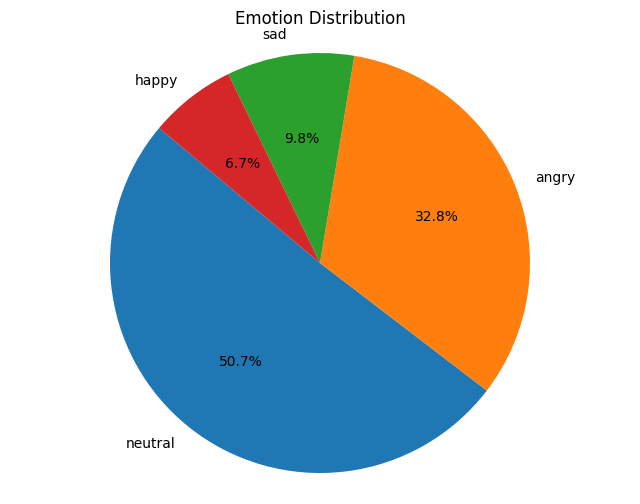

Emotion Distribution:
emotion
neutral    0.507177
angry      0.327751
sad        0.098086
happy      0.066986
Name: count, dtype: float64


In [ ]:
emotion_counts = data['emotion'].value_counts()
emotion_ratios = emotion_counts / len(data)

plt.figure(figsize=(8, 6))
plt.pie(emotion_ratios, labels=emotion_ratios.index, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution')
plt.axis('equal')
plt.show()


emotion_counts = data['emotion'].value_counts()

emotion_ratios = emotion_counts / len(data)

print("Emotion Distribution:")
print(emotion_ratios)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


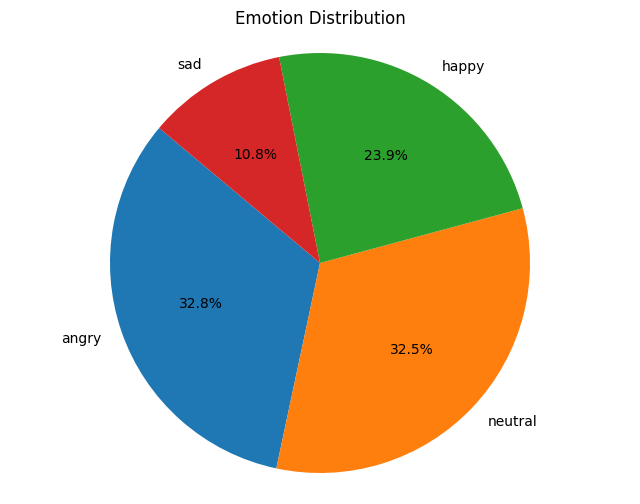

Emotion Distribution:
emotion
angry      0.327751
neutral    0.325359
happy      0.239234
sad        0.107656
Name: count, dtype: float64


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to get synonyms
def get_synonyms(words):
    synonyms = set()
    for word in words:
        for syn in wordnet.synsets(word):
            for lemma in syn.lemmas():
                synonyms.add(lemma.name().lower())
    return list(synonyms)

# Define initial keywords
angry_keywords = ['angry', 'attack', 'assault']
happy_keywords = ['happy', 'celebrate', 'joy']
sad_keywords = ['sad', 'tragedy', 'grief']

extended_happy_keywords = get_synonyms(happy_keywords)
extended_sad_keywords = get_synonyms(sad_keywords)

happy_keywords.extend(extended_happy_keywords)
sad_keywords.extend(extended_sad_keywords)


def label_emotion(text):
    text_lower = text.lower()


    if any(keyword in text_lower for keyword in angry_keywords):
        return 'angry'
    elif any(keyword in text_lower for keyword in happy_keywords):
        return 'happy'
    elif any(keyword in text_lower for keyword in sad_keywords):
        return 'sad'
    else:
        return 'neutral'


data['emotion'] = data['processed_text'].apply(label_emotion)

emotion_counts = data['emotion'].value_counts()

emotion_ratios = emotion_counts / len(data)


plt.figure(figsize=(8, 6))
plt.pie(emotion_ratios, labels=emotion_ratios.index, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution')
plt.axis('equal')
plt.show()


emotion_counts = data['emotion'].value_counts()

# Calculate the ratio or proportion of each emotion
emotion_ratios = emotion_counts / len(data)

print("Emotion Distribution:")
print(emotion_ratios)

In [ ]:

tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))


tfidf_features = tfidf_vectorizer.fit_transform(data['processed_text'])


tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


df_with_tfidf = pd.concat([data[['article_id', 'processed_text', 'emotion']], tfidf_df], axis=1)


print(df_with_tfidf.head())

   article_id                                     processed_text  emotion  \
0           1  abhorrent bottle attack young ranger fan celti...    angry   
1           2  afghan girl iconic national geographic photo a...  neutral   
2           3  whole family wipe victim dreamworld tragedy re...      sad   
3           4  rhony star jule wainstein estrange husband sue...  neutral   
4           5  swam life survivor leviathan ii tragedy sue to...      sad   

               0   0    00   01   02   03  ...   úl  úl    ús  ús     ü   ün  \
0  0.516113  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.483480  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.539360  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.500407  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.527123  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   

   ünn    ă   ăn  ăne  
0  0.0  0.0  0.0  0.0  
1  0.0  

Implementation of CNN

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data
X = df_with_tfidf.drop(['article_id', 'processed_text', 'emotion'], axis=1).values
y = df_with_tfidf['emotion'].values

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Reshape the data for CNN (adding a single channel dimension)
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Build the CNN model
model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_cnn = model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# Print the results
accuracy_cnn = accuracy_score(y_test, y_pred_cnn_classes)
print("CNN Accuracy:", accuracy_cnn)
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn_classes, target_names=label_encoder.classes_))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 675ms/step - accuracy: 0.2540 - loss: 1.3756 - val_accuracy: 0.3284 - val_loss: 1.2489
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.3310 - loss: 1.3518 - val_accuracy: 0.3284 - val_loss: 1.3048
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.3504 - loss: 1.3330 - val_accuracy: 0.3284 - val_loss: 1.2935
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.2892 - loss: 1.3715 - val_accuracy: 0.1642 - val_loss: 1.3288
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.2687 - loss: 1.3487 - val_accuracy: 0.3284 - val_loss: 1.2842
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.3644 - loss: 1.3378 - val_accuracy: 0.4030 - val_loss: 1.2934
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4106 - loss: 1.3267 - val_accuracy: 0.3582 - val_loss: 1.3013
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4270 - loss: 1.3214 - val_accuracy: 0.4925 - val_loss: 1.267

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Prepare the data
X = df_with_tfidf.drop(['article_id', 'processed_text', 'emotion'], axis=1).values
y = df_with_tfidf['emotion'].values

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Reshape the data for CNN (adding a single channel dimension)
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Build the CNN model
model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_cnn = model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# Print the results
accuracy_cnn = accuracy_score(y_test, y_pred_cnn_classes)
print("CNN Accuracy:", accuracy_cnn)
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn_classes, target_names=label_encoder.classes_))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 785ms/step - accuracy: 0.2550 - loss: 1.3902 - val_accuracy: 0.3295 - val_loss: 1.3862
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.2546 - loss: 1.3866 - val_accuracy: 0.1591 - val_loss: 1.3874
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.2557 - loss: 1.3860 - val_accuracy: 0.1591 - val_loss: 1.3897
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.2619 - loss: 1.3858 - val_accuracy: 0.1591 - val_loss: 1.3888
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.2955 - loss: 1.3845 - val_accuracy: 0.1591 - val_loss: 1.3903
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.2862 - loss: 1.3833 - val_accuracy: 0.2273 - val_loss: 1.3910
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.2114 - loss: 1.3877 - val_accuracy: 0.1591 - val_loss: 1.3924
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.2168 - loss: 1.3873 - val_accuracy: 0.1591 - val_loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Prepare the data
X = df_with_tfidf.drop(['article_id', 'processed_text', 'emotion'], axis=1).values
y = df_with_tfidf['emotion'].values

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Reshape the data for LSTM (adding a single channel dimension)
X_train_lstm = np.expand_dims(X_train, axis=2)
X_test_lstm = np.expand_dims(X_test, axis=2)

# Build the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)

# Print the results
accuracy_lstm = accuracy_score(y_test, y_pred_lstm_classes)
print("LSTM Accuracy:", accuracy_lstm)
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm_classes, target_names=label_encoder.classes_))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 593ms/step - accuracy: 0.2079 - loss: 1.3873 - val_accuracy: 0.2841 - val_loss: 1.3853
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 561ms/step - accuracy: 0.2415 - loss: 1.3866 - val_accuracy: 0.1591 - val_loss: 1.3879
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 559ms/step - accuracy: 0.2516 - loss: 1.3855 - val_accuracy: 0.3295 - val_loss: 1.3861
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 559ms/step - accuracy: 0.2541 - loss: 1.3853 - val_accuracy: 0.1591 - val_loss: 1.3891
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 562ms/step - accuracy: 0.2962 - loss: 1.3824 - val_accuracy: 0.1591 - val_loss: 1.3925
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 568ms/step - accuracy: 0.2573 - loss: 1.3879 - val_accuracy: 0.2273 - val_loss: 1.3927
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 567ms/step - accuracy: 0.2840 - loss: 1.3841 - val_accuracy: 0.1591 - val_loss: 1.3929
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 565ms/step - accuracy: 0.2607 - loss: 1.3847 - val_accuracy: 0

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step
LSTM Accuracy: 0.2727272727272727
LSTM Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        21
       happy       0.27      1.00      0.43        30
     neutral       0.00      0.00      0.00        26
         sad       0.00      0.00      0.00        33

    accuracy                           0.27       110
   macro avg       0.07      0.25      0.11       110
weighted avg       0.07      0.27      0.12       110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, Bidirectional
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Prepare the data
X = df_with_tfidf.drop(['article_id', 'processed_text', 'emotion'], axis=1).values
y = df_with_tfidf['emotion'].values

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Standardize the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Reshape the data for LSTM (adding a single channel dimension)
X_train_lstm = np.expand_dims(X_train, axis=2)
X_test_lstm = np.expand_dims(X_test, axis=2)

# Build the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.5),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)

# Print the results
accuracy_lstm = accuracy_score(y_test, y_pred_lstm_classes)
print("LSTM Accuracy:", accuracy_lstm)
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm_classes, target_names=label_encoder.classes_))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 596ms/step - accuracy: 0.2176 - loss: 1.3859 - val_accuracy: 0.1818 - val_loss: 1.3868
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 563ms/step - accuracy: 0.3131 - loss: 1.3741 - val_accuracy: 0.1932 - val_loss: 1.3746
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 565ms/step - accuracy: 0.2739 - loss: 1.3737 - val_accuracy: 0.3068 - val_loss: 1.3564
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 564ms/step - accuracy: 0.3324 - loss: 1.3482 - val_accuracy: 0.2727 - val_loss: 1.3660
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 563ms/step - accuracy: 0.3388 - loss: 1.3608 - val_accuracy: 0.3068 - val_loss: 1.3290
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 565ms/step - accuracy: 0.3083 - loss: 1.3545 - val_accuracy: 0.2841 - val_loss: 1.3379
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 564ms/step - accuracy: 0.3237 - loss: 1.3273 - val_accuracy: 0.2727 - val_loss: 1.3394
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 564ms/step - accuracy: 0.3021 - loss: 1.3560 - val_accuracy: 0.2727 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Prepare the data
X = df_with_tfidf.drop(['article_id', 'processed_text', 'emotion'], axis=1).values
y = df_with_tfidf['emotion'].values

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the MLP model
mlp_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_mlp = mlp_model.predict(X_test)
y_pred_mlp_classes = np.argmax(y_pred_mlp, axis=1)

# Print the results
accuracy_mlp = accuracy_score(y_test, y_pred_mlp_classes)
print("MLP Accuracy:", accuracy_mlp)
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp_classes, target_names=label_encoder.classes_))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.2357 - loss: 1.3868 - val_accuracy: 0.1591 - val_loss: 1.3910
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2735 - loss: 1.3785 - val_accuracy: 0.4318 - val_loss: 1.3734
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4078 - loss: 1.3448 - val_accuracy: 0.2159 - val_loss: 1.3728
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3574 - loss: 1.3173 - val_accuracy: 0.4318 - val_loss: 1.3182
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6258 - loss: 1.2266 - val_accuracy: 0.6023 - val_loss: 1.2351
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6278 - loss: 1.0993 - val_accuracy: 0.5909 - val_loss: 1.1497
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6995 - loss: 0.9801 - val_accuracy: 0.5909 - val_loss: 1.0766
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7810 - loss: 0.7697 - val_accuracy: 0.5114 - val_loss: 1.0526
E

In [ ]:

print(df_with_tfidf.head())

   article_id                                     processed_text  emotion  \
0           1  abhorrent bottle attack young ranger fan celti...    angry   
1           2  afghan girl iconic national geographic photo a...  neutral   
2           3  whole family wipe victim dreamworld tragedy re...      sad   
3           4  rhony star jule wainstein estrange husband sue...  neutral   
4           5  swam life survivor leviathan ii tragedy sue to...      sad   

               0   0    00   01   02   03  ...   úl  úl    ús  ús     ü   ün  \
0  0.516113  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.483480  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.539360  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.500407  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.527123  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   

   ünn    ă   ăn  ăne  
0  0.0  0.0  0.0  0.0  
1  0.0  

In [ ]:
import numpy as np
import pandas as pd
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Prepare the data
data = df_with_tfidf[['processed_text', 'emotion']]

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
X_tokenized = tokenizer(data['processed_text'].tolist(), padding=True, truncation=True, return_tensors='np', max_length=512)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['emotion'])

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tokenized['input_ids'], y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert the resampled data back to tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.int32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.int32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Prepare attention masks
attention_masks_train = tf.convert_to_tensor(np.where(X_train != 0, 1, 0), dtype=tf.int32)
attention_masks_test = tf.convert_to_tensor(np.where(X_test != 0, 1, 0), dtype=tf.int32)

# Load the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Build the transformer model
input_ids = Input(shape=(512,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(512,), dtype=tf.int32, name="attention_mask")

bert_output = bert_model(input_ids, attention_mask=attention_mask)[0]  # Get the last hidden state
cls_token = bert_output[:, 0, :]  # Get the CLS token representation
dropout = Dropout(0.3)(cls_token)
output = Dense(len(label_encoder.classes_), activation='softmax')(dropout)
model = Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit([X_train, attention_masks_train], y_train, epochs=3, batch_size=16, validation_split=0.2)

# Evaluate the model
y_pred = model.predict([X_test, attention_masks_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the results
accuracy = accuracy_score(y_test, y_pred_classes)
print("BERT Accuracy:", accuracy)
print("BERT Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

ValueError: Exception encountered when calling layer 'tf_bert_model_5' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for attention_mask.

Call arguments received by layer 'tf_bert_model_5' (type TFBertModel):
  • input_ids=<KerasTensor shape=(None, 512), dtype=int32, sparse=None, name=input_ids>
  • attention_mask=<KerasTensor shape=(None, 512), dtype=int32, sparse=None, name=attention_mask>
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

In [ ]:
import numpy as np
import pandas as pd
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Prepare the data
data = df_with_tfidf[['processed_text', 'emotion']]

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
X_tokenized = tokenizer(data['processed_text'].tolist(), padding=True, truncation=True, return_tensors='np', max_length=512)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['emotion'])

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tokenized['input_ids'], y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert the resampled data back to tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.int32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.int32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Prepare attention masks
attention_masks_train = tf.convert_to_tensor(np.where(X_train != 0, 1, 0), dtype=tf.int32)
attention_masks_test = tf.convert_to_tensor(np.where(X_test != 0, 1, 0), dtype=tf.int32)

# Load the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Build the transformer model
input_ids = Input(shape=(512,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(512,), dtype=tf.int32, name="attention_mask")

bert_output = bert_model(input_ids, attention_mask=attention_mask)[0]  # Get the last hidden state
cls_token = bert_output[:, 0, :]  # Get the CLS token representation
dropout = Dropout(0.3)(cls_token)
output = Dense(len(label_encoder.classes_), activation='softmax')(dropout)
model = Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit([X_train, attention_masks_train], y_train, epochs=3, batch_size=16, validation_split=0.2)

# Evaluate the model
y_pred = model.predict([X_test, attention_masks_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the results
accuracy = accuracy_score(y_test, y_pred_classes)
print("BERT Accuracy:", accuracy)
print("BERT Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

ValueError: Exception encountered when calling layer 'tf_bert_model_6' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for attention_mask.

Call arguments received by layer 'tf_bert_model_6' (type TFBertModel):
  • input_ids=<KerasTensor shape=(None, 512), dtype=int32, sparse=None, name=input_ids>
  • attention_mask=<KerasTensor shape=(None, 512), dtype=int32, sparse=None, name=attention_mask>
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

In [ ]:
import numpy as np
import pandas as pd
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Prepare the data
data = df_with_tfidf[['processed_text', 'emotion']]

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
X_tokenized = tokenizer(data['processed_text'].tolist(), padding=True, truncation=True, return_tensors='np', max_length=512)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['emotion'])

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tokenized['input_ids'], y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert the resampled data back to tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.int32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.int32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Prepare attention masks
attention_masks_train = tf.convert_to_tensor(np.where(X_train != 0, 1, 0), dtype=tf.int32)
attention_masks_test = tf.convert_to_tensor(np.where(X_test != 0, 1, 0), dtype=tf.int32)

# Load the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Build the transformer model
input_ids = Input(shape=(512,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(512,), dtype=tf.int32, name="attention_mask")

bert_output = bert_model(input_ids, attention_mask=attention_mask)[0]  # Get the last hidden state
cls_token = bert_output[:, 0, :]  # Get the CLS token representation
dropout = Dropout(0.3)(cls_token)
output = Dense(len(label_encoder.classes_), activation='softmax')(dropout)
model = Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit([X_train, attention_masks_train], y_train, epochs=3, batch_size=16, validation_split=0.2)

# Evaluate the model
y_pred = model.predict([X_test, attention_masks_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the results
accuracy = accuracy_score(y_test, y_pred_classes)
print("BERT Accuracy:", accuracy)
print("BERT Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

ValueError: Exception encountered when calling layer 'tf_bert_model_7' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for attention_mask.

Call arguments received by layer 'tf_bert_model_7' (type TFBertModel):
  • input_ids=<KerasTensor shape=(None, 512), dtype=int32, sparse=None, name=input_ids>
  • attention_mask=<KerasTensor shape=(None, 512), dtype=int32, sparse=None, name=attention_mask>
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

In [ ]:
import numpy as np
import pandas as pd
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Prepare the data
data = df_with_tfidf[['processed_text', 'emotion']]

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
X_tokenized = tokenizer(data['processed_text'].tolist(), padding=True, truncation=True, return_tensors='np', max_length=512)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['emotion'])

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tokenized['input_ids'], y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert the resampled data back to tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.int32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.int32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Prepare attention masks
attention_masks_train = tf.convert_to_tensor(np.where(X_train != 0, 1, 0), dtype=tf.int32)
attention_masks_test = tf.convert_to_tensor(np.where(X_test != 0, 1, 0), dtype=tf.int32)

# Load the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Build the transformer model
input_ids = Input(shape=(512,), dtype=tf.int32, name="input_ids")
# Remove the attention_mask Input layer
# attention_mask = Input(shape=(512,), dtype=tf.int32, name="attention_mask")

bert_output = bert_model(input_ids, attention_mask=attention_masks_train)[0]  # Use the pre-computed attention mask
cls_token = bert_output[:, 0, :]
dropout = Dropout(0.3)(cls_token)
output = Dense(len(label_encoder.classes_), activation='softmax')(dropout)
model = Model(inputs=input_ids, outputs=output)  # Update model inputs

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit([X_train, attention_masks_train], y_train, epochs=3, batch_size=16, validation_split=0.2)

# Evaluate the model
y_pred = model.predict([X_test, attention_masks_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the results
accuracy = accuracy_score(y_test, y_pred_classes)
print("BERT Accuracy:", accuracy)
print("BERT Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

ValueError: Exception encountered when calling layer 'tf_bert_model_9' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for input_ids.

Call arguments received by layer 'tf_bert_model_9' (type TFBertModel):
  • input_ids=<KerasTensor shape=(None, 512), dtype=int32, sparse=None, name=input_ids>
  • attention_mask=tf.Tensor(shape=(438, 512), dtype=int32)
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

RNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess the data
data = df_with_tfidf.copy()  # Assuming df_with_tfidf is your DataFrame with processed_text and emotion columns

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['processed_text'])
X = tokenizer.texts_to_sequences(data['processed_text'])
X = pad_sequences(X, padding='post')

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['emotion'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X.shape[1]))
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the results
accuracy = accuracy_score(y_test, y_pred_classes)
print("RNN Accuracy:", accuracy)
print("RNN Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.2460 - loss: 1.3876 - val_accuracy: 0.3134 - val_loss: 1.3843
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3059 - loss: 1.3966 - val_accuracy: 0.4328 - val_loss: 1.3442
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3476 - loss: 1.4720 - val_accuracy: 0.3284 - val_loss: 1.6183
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3385 - loss: 1.5287 - val_accuracy: 0.3284 - val_loss: 1.3592
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3047 - loss: 1.5017 - val_accuracy: 0.4328 - val_loss: 1.2813
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step
RNN Accuracy: 0.32142857142857145
RNN Classification Report:
              precision    recall  f1-score   support

       angry       0.32      1.00      0.49        27
       happy       0.00      0.00      0.00        24
     neutral       0.00      0.00      0.00        27
         sad       0.00      0.00      0.00         6

    accuracy           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess the data
data = df_with_tfidf.copy()  # Assuming df_with_tfidf is your DataFrame with processed_text and emotion columns

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['processed_text'])
X = tokenizer.texts_to_sequences(data['processed_text'])
X = pad_sequences(X, padding='post')

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['emotion'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the enhanced RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the results
accuracy = accuracy_score(y_test, y_pred_classes)
print("Enhanced RNN Accuracy:", accuracy)
print("Enhanced RNN Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 91s 9s/step - accuracy: 0.3155 - loss: 1.3739 - val_accuracy: 0.3284 - val_loss: 1.2986
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 136s 9s/step - accuracy: 0.2823 - loss: 1.3369 - val_accuracy: 0.3284 - val_loss: 1.3142
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 78s 9s/step - accuracy: 0.3146 - loss: 1.3164 - val_accuracy: 0.3284 - val_loss: 1.2698
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 81s 9s/step - accuracy: 0.3354 - loss: 1.3065 - val_accuracy: 0.3284 - val_loss: 1.2867
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 79s 9s/step - accuracy: 0.2648 - loss: 1.3506 - val_accuracy: 0.3284 - val_loss: 1.3421
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 79s 9s/step - accuracy: 0.3161 - loss: 1.3385 - val_accuracy: 0.3284 - val_loss: 1.2895
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.3039 - loss: 1.3299 - val_accuracy: 0.4328 - val_loss: 1.2862
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 83s 9s/step - accuracy: 0.3034 - loss: 1.3341 - val_accuracy: 0.4328 - val_loss: 1.2933
Epoch 9/10
9/9 ━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install scikeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
# Install necessary libraries
!pip install transformers
!pip install imbalanced-learn

import numpy as np
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Prepare the data
X = data['processed_text'].values
y = data['emotion'].values

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenize the text
X_tokenized = tokenizer(X.tolist(), padding=True, truncation=True, return_tensors='tf')

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tokenized['input_ids'].numpy(), y_encoded)

# Convert to TensorFlow datasets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create attention masks
attention_masks = np.where(X_resampled != 0, 1, 0)

# Split attention masks
attention_masks_train, attention_masks_test = train_test_split(attention_masks, test_size=0.2, random_state=42)

# Load the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Build the transformer model
input_ids = Input(shape=(X_train.shape[1],), dtype=tf.int32, name="input_ids")
attention_masks_input = Input(shape=(X_train.shape[1],), dtype=tf.int32, name="attention_masks")
bert_output = bert_model(input_ids, attention_mask=attention_masks_input)[1]  # Get the pooled output
dropout = Dropout(0.3)(bert_output)
output = Dense(len(label_encoder.classes_), activation='softmax')(dropout)
model = Model(inputs=[input_ids, attention_masks_input], outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit([X_train, attention_masks_train], y_train, epochs=3, batch_size=16, validation_split=0.2)

# Evaluate the model
y_pred = model.predict([X_test, attention_masks_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the results
accuracy = accuracy_score(y_test, y_pred_classes)
print("BERT Accuracy:", accuracy)
print("BERT Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

ValueError: Exception encountered when calling layer 'tf_bert_model' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for attention_mask.

Call arguments received by layer 'tf_bert_model' (type TFBertModel):
  • input_ids=<KerasTensor shape=(None, 512), dtype=int32, sparse=None, name=input_ids>
  • attention_mask=<KerasTensor shape=(None, 512), dtype=int32, sparse=None, name=attention_masks>
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False